<h1 style='color: green; font-size: 36px; font-weight: bold;'>O Dataset e o Projeto</h1>
<hr>


<p style='font-size: 18px; line-height: 2; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>O objetivo deste projeto será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>


<p style='font-size: 18px; line-height: 2; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>




### Fonte dos dados: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição das colunas:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Data</b> - Data</li>
    <li><b>Temperatura_Media</b> - Temperatura Média (°C)</li>
    <li><b>Temperatura_Minima</b> - Temperatura Mínima (°C)</li>
    <li><b>Temperatura_Maxima</b> - Temperatura Máxima (°C)</li>
    <li><b>Precipitacao</b> - Precipitação (mm)</li>
    <li><b>Final_de_Semana</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>Consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Importando as libs e o dataset
***

In [1]:
# Análise e manipulação
import pandas as pd
import numpy as np

# Visualização
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Erros
import warnings
warnings.filterwarnings('ignore')

# renderizar gráficos no Github
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
# Importando os dados e convertendo o separador decimal de vírgula para ponto
df = pd.read_csv('Dados/consumo_cerveja.csv', decimal=',')

## Entendimento, alterações e limpeza dos dados
***

In [3]:
# Visualizando a estrutura do dataset
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [4]:
# Alterando o nome das colunas
df.columns = ['Data', 'Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana', 'Consumo']
df.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [5]:
# Removendo o separador de milhares da coluna consumo
df.Consumo = df.Consumo.astype(str)
df.Consumo = df.Consumo.str.replace('.', '')
df

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,nan
937,NaN,NaN,NaN,NaN,NaN,NaN,nan
938,NaN,NaN,NaN,NaN,NaN,NaN,nan
939,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [6]:
# Verificando a quantidade de linhas e colunas
print("O conjunto de dados contém {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

O conjunto de dados contém 941 linhas e 7 colunas


In [7]:
# Checando se há valores nulos
df.isnull().sum()

Data                  576
Temperatura_Media     576
Temperatura_Minima    576
Temperatura_Maxima    576
Precipitacao          576
Final_de_Semana       576
Consumo                 0
dtype: int64

In [8]:
# Eliminando os valores nulos 
# Observação: os valores nulos identificados no dataset são linhas em branco, sem nenhuma informação.
df =  df.dropna()

In [9]:
# Verificando a nova quantidade de linhas e colunas
print("O conjunto de dados contém {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

O conjunto de dados contém 365 linhas e 7 colunas


In [10]:
# Transformando a coluna consumo em um tipo numerico
df['Consumo'] = pd.to_numeric(df['Consumo'])

## Análise Exploratória dos Dados
***

### Como foi o consumo de cerveja ao longo do ano?

In [11]:
fig = px.line(df, x='Data', y='Consumo')

fig.update_layout(title_text='Consumo de Cerveja ao Longo (2015)', title_x = 0.5,
                 xaxis_title='Data',
                 yaxis_title='Consumo (em litros)')
fig.update_traces(line_color='cornflowerblue')
fig.show()

### Qual a quantidade de cerveja consumida no final de semana e durante a semana?

In [12]:
dias_da_semana = sum(df[df.Final_de_Semana == 0]['Consumo'])
fds = sum(df[df.Final_de_Semana==1]['Consumo'])
total = df.Consumo.sum()

labels = ['Total','Durante a Semana','Final de Semana']
values = [total, dias_da_semana, fds]
colors = ['brown','darkorange','lightskyblue']

fig = go.Figure(data=[go.Bar(
    
    x=labels, y=values, marker_color= colors,
    text = values
)])

fig.update_layout(title_text='Consumo de cerveja durante a semana e final de semana', title_x = 0.5,
                 yaxis_title='Consumo (em milhões de litros)')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')

fig.show()

Podemos observar que o total de cerveja consumida nos dias da semana foi maior do que no final de semana. Para entender melhor essa distribuição de consumo, vamos criar um gráfico com o consumo por dia da semana, onde iremos observar quantidade média de cerveja consumida em cada dia.


### Em média quantos litros de cerveja foi consumido por dia da semana?

Primeiro precisamos adicionar os dias da semana ao dataframe.

In [13]:
# Transformando a coluna Data em um obketo Datetime
df['Data'] = pd.to_datetime(df['Data'])

In [14]:
# Extraindo da coluna data o dia da semana e o mês para criar duas novas colunas
df['Mes'] = df['Data'].apply(lambda x: x.strftime('%B'))
df['Dia'] = df['Data'].apply(lambda x: x.strftime('%A'))

In [15]:
df.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo,Mes,Dia
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461,January,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972,January,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814,January,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799,January,Sunday
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900,January,Monday


In [16]:
# O dia da semana e o mês estão em inglês... Temos que fazer a tradução para português renomeando os dias da semana e os meses.
# Renomeando os meses
df['Mes'] = df['Mes'].map({
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April' : 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July' : 'Julho',
    'August' : 'Agosto',
    'September' : 'Setembro',
    'October' : 'Outubro',
    'November' : 'Novembro',
    'December' : 'Dezembro'
})

In [17]:
# Renomeando os dias da semana
df['Dia'] = df['Dia'].map({
    'Sunday' : 'Domingo', 
    'Monday' : 'Segunda-feira', 
    'Tuesday' : 'Terça-feira', 
    'Wednesday' : 'Quarta-feira', 
    'Thursday' : 'Quinta-feira', 
    'Friday' : 'Sexta-feira',
    'Saturday' : 'Sábado'
})

In [18]:
df

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo,Mes,Dia
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461,Janeiro,Quinta-feira
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972,Janeiro,Sexta-feira
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814,Janeiro,Sábado
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799,Janeiro,Domingo
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900,Janeiro,Segunda-feira
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32307,Dezembro,Domingo
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26095,Dezembro,Segunda-feira
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22309,Dezembro,Terça-feira
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20467,Dezembro,Quarta-feira


In [19]:
fig = px.box(df, x='Dia', y='Consumo', color='Dia', orientation='v', notched=True)

fig.update_xaxes(categoryorder='array', categoryarray= ['Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'])

fig.update_layout(title_text='Consumo de Cerveja por Dia da Semana', title_x = 0.5,
                 xaxis_title='Dia da Semana',
                 yaxis_title='Consumo (em litros)')

fig.show()


Durante toda a semana a maior parte do consumo de cerveja foi no sábado, seguido do domingo. Podemos concluir que, em média, a cerveja foi mais consumida nos finais de semana.

### **Qual foi o consumo de cerveja por mês?**

In [20]:
fig = px.box(df, x='Mes', y='Consumo', color='Mes', orientation='v', notched=True)

fig.update_xaxes(categoryorder='array', categoryarray= ['Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'])

fig.update_layout(title_text= 'Consumo de Cerveja por Mês Durante 2015', title_x = 0.5,
                 xaxis_title='Mês',
                 yaxis_title='Consumo (em litros)')

fig.show()

Podemos observar que o consumo de cerveja foi maior de dezembro a março, enquanto diminuiu em meados de junho e julho. É interessante verificar a temperatura.


### **Como foi a temperatura durante o ano?**

In [21]:
fig = go.Figure()


# Create and style traces
fig.add_trace(go.Scatter(x=df['Data'], y=df['Temperatura_Minima'], name='Temperatura Mínima',
                         line=dict(color='cornflowerblue', width=1.5)))
fig.add_trace(go.Scatter(x=df['Data'], y=df['Temperatura_Maxima'], name = 'Temperatura Máxima',
                         line=dict(color='orangered', width=1.5)))
fig.add_trace(go.Scatter(x=df['Data'], y=df['Temperatura_Media'], name='Temperatura Média',
                         line=dict(color='mediumaquamarine', width=1.5,
                              dash='dash') 
))


# Edit the layout
fig.update_layout(title='Temperatura em São Paulo (2015)', title_x = 0.5,
                   xaxis_title='Data',
                   yaxis_title='Temperatura (°C)')

fig.show()

##### Através do gráfico conseguimos ver a variação da temperatura de acordo com as estações do ano.

A seguir vamos definir os meses da seguinte forma:

**Verão**: janeiro, fevereiro e março.

**Outono**: abril, maio e junho.

**Inverno**: Julho, agosto e setembro.

**Primavera**: Outubro, novembro e dezembro.

### **Qual o consumo de cerveja por estação do ano?**

In [22]:
estacoes = {
    'Janeiro': 'Verão',
    'Fevereiro': 'Verão',
    'Março': 'Verão',
    'Abril': 'Outuno',
    'Maio': 'Outuno',
    'Junho': 'Outuno',
    'Julho': 'Inverno',
    'Agosto': 'Inverno',
    'Setembro': 'Inverno',
    'Outubro': 'Primavera',
    'Novembro': 'Primavera',
    'Dezembro': 'Primavera'
    
}


df['Estacao'] = df['Mes'].apply(lambda x: estacoes[x])

In [23]:
fig = px.box(df, x='Estacao', y='Consumo', color='Estacao', orientation='v', notched=True, title = 'Beer Consumption by Seasons of the year' )

fig.update_layout(title='Consumo de Cerveja nas Estações do Ano', title_x = 0.5,
                   xaxis_title='Estação',
                   yaxis_title='Cerveja (em litros)')

fig.show()

Podemos observar que o maior consumo de cerveja foi durante o verão e primavera, surpreendentemente seguido pelo inverno e outuno.

### Como estão as chuvas durante o ano?

In [24]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df['Data'], y=df['Precipitacao'], name='Chuva durante o ano de 2015',
                         line=dict(color='skyblue', width=3)))



# Edit the layout
fig.update_layout(title='Chuvas durante o ano de 2015', title_x = 0.5,
                   xaxis_title='Data',
                   yaxis_title='Precipitação (em mm)')
fig.show()

A chuva não parece ter uma relação muito forte em comparação ao consumo de cerveja. As precipitações mais altas são durante o verão, mas como a cerveja normalmente é consumida como forma de aliviar o calor, pode ser que tenha um caso de correlação mas não de causalidade.

## Visualizando a relação entre as variáveis
***

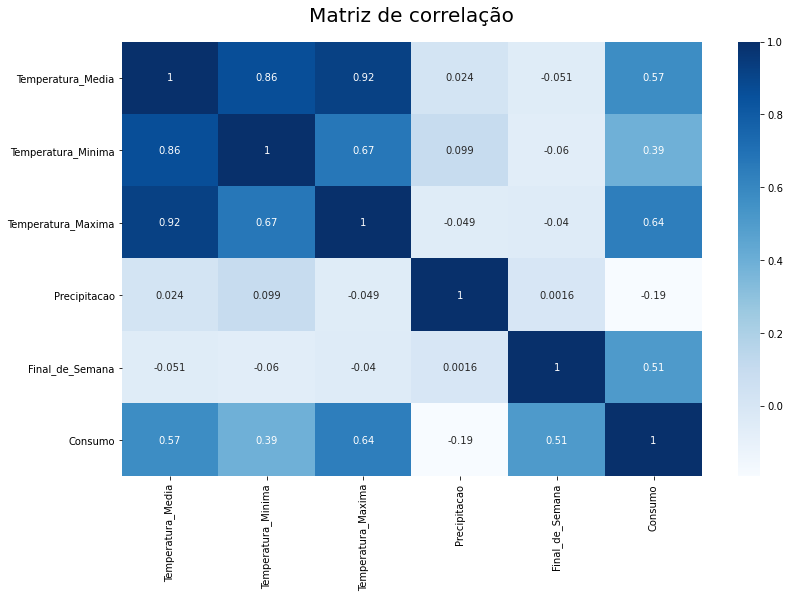

In [25]:
# Mapa de calor de correlação
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.title('Matriz de correlação', fontsize = 20, pad = 20)
plt.show()

Valores próximos a 0 indicam baixa ou nenhuma correlação e valores próximos a 1 ou -1 refletem alta correlação, sendo o primeiro diretamente proporcional e o segundo inversamente proporcional. Apesar da correlação medir a intensidade de relação entre duas variáveis, isso não significa causalidade entre elas.

Text(0.5, 1.15, 'Dispersão entre as variáveis')

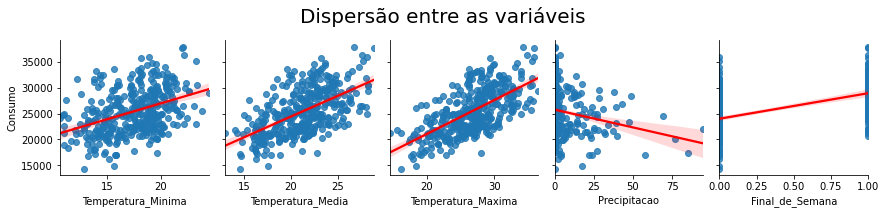

In [26]:
# Visualizando a relação entre o consumo e as demais variáveis do nosso conjunto de dados
ax = sns.pairplot(df, y_vars='Consumo', x_vars=['Temperatura_Minima', 'Temperatura_Media', 'Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana'], kind = 'reg',
                 plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15)

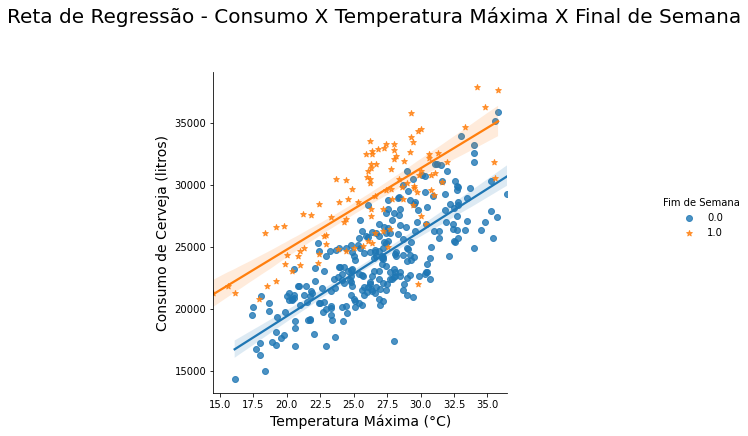

In [27]:
# Relação entre o consumo de cerveja, temperatura máxima e o final de semana
ax = sns.lmplot(x = 'Temperatura_Maxima', y = 'Consumo', data = df, hue = 'Final_de_Semana', markers=['o', '*'], legend = False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura Máxima X Final de Semana', fontsize = 20, y = 1.15)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize = 14)
ax.add_legend(title='Fim de Semana')

ax

A temperatura máxima foi a variável que apresentou a melhor relação com o consumo de cerveja. Como vimos anteriormente, saber se é ou não final de semana também vai interferir no consumo médio de cerveja.

## **Criando um modelo de regressão linear**
***

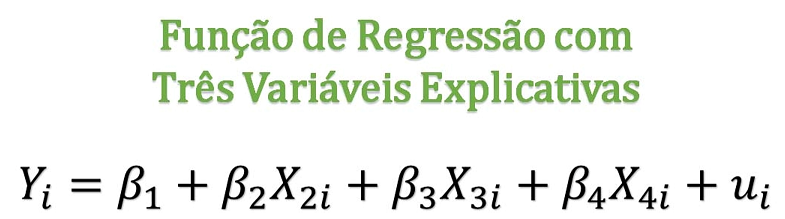

In [28]:
# Separando as variáveis em: X = Variáveis explicativas, y = Variável dependente
X, y = df[['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana']], df.Consumo

In [29]:
# Separando o modelo de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [30]:
# Instanciando a classe LinearRegression()
modelo = LinearRegression()

In [31]:
# Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)
# Em outras palavras: estamos treinando o modelo utilizando o conjunto de dedas de treino.
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1. Quanto mais próximo do 1 melhor.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$


In [32]:
# Obtendo o coeficiente de determinação (R²)
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


Separamos nossos dados em treino e teste, fizemos a estimativa do modelo linear utilizando os dados de treino e tivemos um resultado do R² de 0,73. De forma mais simples, o R² mede o quanto da variação da variável dependente (Consumo) é explicada pelo modelo.

In [33]:
# Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"
y_previsto = modelo.predict(X_test)

In [34]:
# Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


### Gerando previsão pontual e criando um simulador simples



In [35]:
# Utilizando uma linha qualquer de nossa base de teste para gerar uma previsão de consumo.
entrada = X_test[0:1]
entrada

,Temperatura_Maxima,Precipitacao,Final_de_Semana
5,30.5,12.2,0.0


In [36]:
modelo.predict(entrada)[0].round(2)

26094.9

In [37]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} Litros'.format(modelo.predict(entrada)[0]))

26094.90 Litros


## Coeficientes Estimados

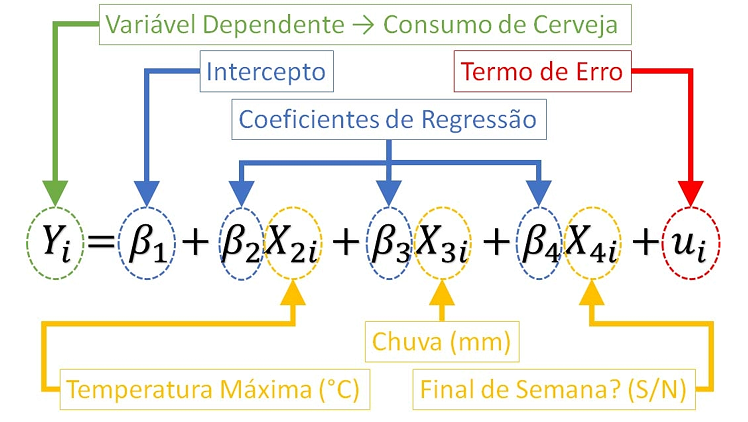

### Intercepto do modelo
O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [38]:
# Obtendo o intercepto do modelo
modelo.intercept_

5951.976339312445

### Coeficientes de regressão
Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.

In [39]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

### Coeficientes do modelo

In [40]:
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5.951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5.401,08 litros</b>.
</p>

## Análise Gráfica do Modelo
***

In [41]:
# Gerando as previsões do modelo para os dados de TREINO
y_previsto_train = modelo.predict(X_train)

In [42]:
fig = px.scatter(x=y_previsto_train, y=y_train, trendline='ols', trendline_color_override='red')

fig.update_layout(title='Previsão x Real', title_x = 0.5,
                   xaxis_title='Consumo de Cerveja (litros) - Previsão',
                   yaxis_title='Consumo de Cerveja (litros) - Real')

fig.show()

In [43]:
# Resíduo = Valor real - valor previsto
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: Consumo, Length: 255, dtype: float64

In [44]:
fig = px.scatter(x=y_previsto_train, y=residuo, trendline='ols', trendline_color_override='red')

fig.update_layout(title='Resíduos x Previsão', title_x = 0.5,
                   xaxis_title='Consumo de Cerveja (litros)',
                   yaxis_title='Resíduo')

fig.show()

In [45]:
fig = px.scatter(x=y_previsto_train, y=residuo**2, trendline='ols', trendline_color_override='red')

fig.update_layout(title='Resíduos ao quadrado x Previsão', title_x = 0.5,
                   xaxis_title='Consumo de Cerveja (litros)',
                   yaxis_title='Resíduo')

fig.show()

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Resíduos', ylabel='Density'>

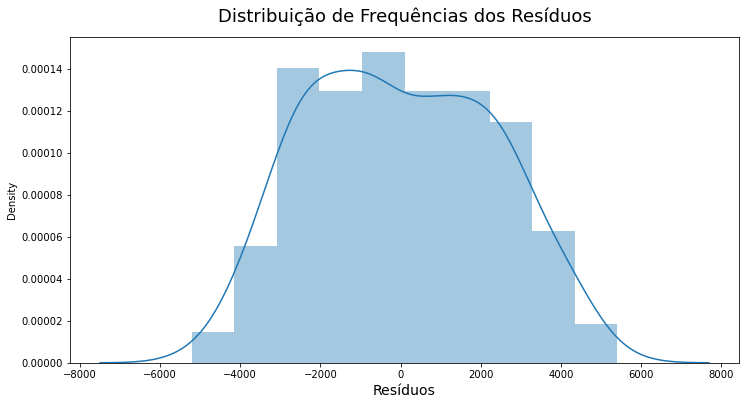

In [46]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize = 18, pad = 15)
ax.set_xlabel('Resíduos', fontsize = 14)
ax

Nos dois primeiros gráficos vemos que a variação ocorre de forma mais expressiva quando estamos lidando com valores maiores, e não uma constante variação em todo o processo. 

No gráfico de distribuição de frequência dos resíduos vemos algo que se assemelha a uma curva normal (simétrica).

Como estamos trabalhando com uma base de dados pequena, com apenas 365 entradas, é comum que isso ocorra. Adicionando mais entradas e mais variáveis ao dataset é bem provavel que os gráficos de resíduos apresentem uma variação mais controlada e uma distribuição de frequência mais simétrica.

## Comparando Modelos
***

Estimando um novo modelo com a substituição da variável explicativa Temperatura_Máxima pela Temperatuda_Média

In [47]:
# Definindo as variáveis explicativas
X2 = df[['Temperatura_Media', 'Precipitacao', 'Final_de_Semana']]

# Separando treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state = 2811)

# Instanciando a classe LinearRegression()
modelo_2 = LinearRegression()

# Utilizando o método fit() do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)
modelo_2.fit(X2_train, y2_train)

LinearRegression()

Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [48]:
print('Modelo com temperatura média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com temperatura média
R² = 0.66


In [49]:
print('Modelo com temperatura máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com temperatura máxima
R² = 0.73


Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método predict() dos objetos "modelo" e "modelo_2"

In [50]:
y_previsto_2 = modelo_2.predict(X2_test)

In [51]:
print('Modelo com temperatura média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com temperatura média
R² = 0.66


In [52]:
print('Modelo com temperatura máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com temperatura máxima
R² = 0.69


## Outras métricas de Avaliação do Modelo

In [53]:
MAE = mean_absolute_error(y_test, y_previsto).round(2)
MAPE = mean_absolute_percentage_error(y_test, y_previsto).round(2)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2) 
R2 = metrics.r2_score(y_test, y_previsto).round(2)

In [54]:
# MODELO COM TEMPERATURA MÁXIMA
pd.DataFrame([R2, RMSE, MAE, MAPE], ['R²', 'RMSE', 'MAE', 'MAPE'], columns =['Métricas'])

,Métricas
R²,0.69
RMSE,2339.23
MAE,1966.56
MAPE,0.08


In [55]:
# MODELO COM TEMPERATURA MÉDIA
MAE_2 = mean_absolute_error(y2_test, y_previsto_2).round(2)
MAPE_2 = mean_absolute_percentage_error(y2_test, y_previsto_2).round(2)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2) 
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([R2_2, RMSE_2, MAE_2, MAPE_2], ['R²', 'RMSE', 'MAE', 'MAPE'], columns =['Métricas'])

,Métricas
R²,0.66
RMSE,2461.86
MAE,2068.99
MAPE,0.08


O modelo com a temperatura máxima apresenta melhores resultados.

O R² é maior. Isso significa que nosso modelo explicou 69% da variação através dos dados.

O RMSE e MAE é mais baixo, ou seja, a diferença entre o valor previsto e o valor real é menor.

## Gerando previsão pontual
***


In [56]:
modelo.predict(entrada)[0]

26094.901775262017

In [57]:
Temperatura_máxima = 30.5 # Temperatura máxima (°C)
Precipitacao = 12.2 # Precipitação em mm.
Final_de_semana = 0 # 1 = SIM; 0 = NÃO
entrada = [[Temperatura_máxima, Precipitacao, Final_de_semana]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros
